# Assignment 5
### Do all four questions.

**1.** Let's review some basic matrix multiplication. When you have an $M \times N$ matrix $A$ with $M$ rows and $N$ columns, 
$$
A= \left[ \begin{array}{cccc} a_{11} & a_{12} & ... & a_{1N} \\
a_{21} & a_{22} & ... & a_{2N} \\
\vdots & \vdots & ... & \vdots \\
a_{M1} & a_{M2} & ... & a_{MN} 
\end{array} \right],
$$
and you right-multiply it by a vector
$$
x = \left[ \begin{array}{c} x_1 \\ x_2 \\ \vdots \\ x_N 
\end{array} \right],
$$
you get
$$
Ax = \left[ \begin{array}{c} \sum_{i=1}^N a_{1i} x_i \\ \sum_{i=1}^N a_{2i} x_i \\ \vdots \\ \sum_{i=1}^N a_{Mi} x_i 
\end{array} \right].
$$
This is just "matrix row times column vector" element-by-element, stacking the results into a new vector.

For this to make sense, $N$ must be the same for the matrix and the vector, but $M$ can be different from $N$. 

Let's play with some NumPy to see this. First we'll define a matrix $A$:

In [1]:
import numpy as np

A = np.array([ [1,2,3],
              [4,5,6],
              [7,8,9]])
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

a. Multiply $A$ times each of the following vectors using the @ operator. Explain which part of the $A$ matrix gets selected and explain why, using the definition of matrix multiplication. 

In [2]:
e_1 = np.array([1,0,0])
e_2 = np.array([0,1,0])
e_3 = np.array([0,0,1])

In [3]:
# Multiplying A with e_1. return the first column of A
# the first element is 1*1+2*0+3*0 = 1
# the second element is 4*1+5*0+6*0 = 4
# the third element is 7*1+8*0+9*0 = 7
# M
A@e_1

array([1, 4, 7])

In [4]:
# Multiplying A with e_2 returns the second column of A
# the first element is 1*0+2*1+3*0 = 2
# the second element is 4*0+5*1+6*0 = 5
# the third element is 7*0+8*1+9*0 = 8
A@e_2

array([2, 5, 8])

In [5]:
# Multiplying A with e_3 returns the third column of A
# the first element is 1*0+2*0+3*1 = 3
# the second element is 4*0+5*0+6*1 = 6
# the third element is 7*0+8*0+9*1 = 9
A@e_3

array([3, 6, 9])

b. Now multiply $A$ times $u = (1,1,1)$. Explain the logic of the result with the definition of matrix multiplication.

In [6]:
u = np.ones(3)

In [7]:
# it returns the sum of each row of A
# the first element is 1*1+2*1+3*1 = 6
# the second element is 4*1+5*1+6*1 = 15
# the third element is 7*1+8*1+9*1 = 24
A@u

array([ 6., 15., 24.])

c. Whenever a matrix has 1's on the diagonal and zeros everywhere else, we call it an **identity matrix**. What happens when you multiple $A$ times $x$ below? What happens when you multiple an identity matrix times any vector? Explain your result with the definition of matrix multiplication.

In [8]:
A = np.array([ [1,0,0],
              [0,1,0],
              [0,0,1]])
x = np.array([-2,4,11])


In [9]:
# the result returns the vector x
# first element 1*(-2)+0*4+0*11 = -2
# second element 0*(-2)+1*4+0*11 = 4
# third element 0*(-2)+0*4+1*11 = 11
A@x

array([-2,  4, 11])

d. What if every row and column sum to 1, but the 1's are no longer on the diagonal? Multiple $A$ times $X$ below and explain the result. Create another matrix whose rows and columns sum to 1, but is not an identity matrix, and show how it permutes the values of $x$. 

In [10]:
A = np.array([ [0,0,1],
              [1,0,0],
              [0,1,0]])
x = np.array([-2,4,11])

In [11]:
# it returns the vestor x in a new order: 11,-2,4
# first element 0*(-2)+0*4+1*11 = 11
# second element 1*(-2)+0*4+0*11 = -2
# third element 0*(-2)+1*4+0*11 = 4
A@x

array([11, -2,  4])

e. The next matrix $A$ could be a Markov transition matrix: Its columns sum to 1, and each entry $a_{ij}$ can be interpreted as the proportion of observations who moved from state $j$ to state $i$. Multiply $A$ by each of the vectors $e_1$, $e_2$, and $e_3$, and explain your results.

In [12]:
rng = np.random.default_rng(100)
A = rng.random((3,3)) # Generate a random 3X3 matrix
sums = np.sum(A,axis=0) # Column sums
A = A/sums # Normalize the columns so they sum to 1
print(A)

[[0.50052958 0.24049286 0.18358131]
 [0.02574731 0.39251588 0.37907577]
 [0.47372311 0.36699127 0.43734292]]


f. For each of the vectors $e_1, e_2, e_3$, multiple $A$ times that vector 5 times. What answer do you get for each starting vector? Describe the behavior you observe.

In [13]:
# getting 5 multiplication for e_1
v1=A@e_1
v1

array([0.50052958, 0.02574731, 0.47372311])

In [14]:
v2 = A@v1
v2

array([0.34368862, 0.20257047, 0.45374091])

In [15]:
v3 = A@v2
v3

array([0.30404142, 0.26036337, 0.43559521])

In [16]:
v4 = A@v3
v4

array([0.29476439, 0.27514859, 0.43008701])

In [17]:
# Result for e_1 after 5 multimplication
v5 = A@v4
v5

array([0.29266551, 0.27862515, 0.42870935])

In [18]:
# getting 5 multiplications for e_2
b1=A@e_2
b1

array([0.24049286, 0.39251588, 0.36699127])

In [19]:
b2=A@b1
b2

array([0.28214379, 0.29937825, 0.41847795])

In [20]:
b3=A@b2
b3

array([0.29004438, 0.28341002, 0.42654561])

In [21]:
b4=A@b3
b4

array([0.29163968, 0.2804039 , 0.42795643])

In [22]:
# Result for e_2 after 5 multimplication
b5=A@b4
b5

array([0.29197422, 0.27979983, 0.42822595])

In [23]:
# multiplication of e_3
c1 = A@e_3
c1

array([0.18358131, 0.37907577, 0.43734292])

In [24]:
c2 = A@c1
c2

array([0.26334088, 0.31930609, 0.41735304])

In [25]:
c3 = A@c2
c3

array([0.28521895, 0.29032145, 0.4244596 ])

In [26]:
c4 = A@c3
c4

array([0.29050361, 0.28220175, 0.42729464])

In [27]:
# Result for e_3 after 5 multimplication
c5 = A@c4
c5

array([0.29171646, 0.2802254 , 0.42805814])

In [28]:
# Conclusion, the results for e_1, e_2. e_3 after 5 multiplications are similar to each other

*2.* Let's consider a simple Markov transition matrix over two states:
$$
T = \left[ \begin{array}{cc} p_{1\leftarrow 1} &  p_{1\leftarrow 2} \\
p_{2 \leftarrow 1} & p_{2 \leftarrow 2} \end{array}\right] 
$$
The arrows help visualize the transition a bit: This is the same index notation as usual, $p_{ij}$, but writing it $p_{i \leftarrow j}$ emphasizes that it's the proportion of times that state $j$ transitions to state $i$. Below, $T$ is given by
$$
T = \left[ \begin{array}{cc} .25 & .5 \\
.75 & .5 \end{array}\right].
$$

- Start in state 1, at the initial condition $[1,0]$. Multiply that vector by $T$. Write out the result in terms of the formula and compute the result in a code chunk below. What is this object you're looking at, in terms of proportions and transitions?
- Multiple by $T$ again. What do you get? This isn't a column of $T$. Explain in words what it is. (Hint: A forecast of what in what period?)
- Keep multiplying the current vector of outcomes by $T$. When does it start to settle down without changing further?
- Do the above analysis again, starting from the initial condition $[0,1]$. Do you get a different result?
- The take-away is that, in the long run, these chains settle down into the long-run proportions, and the sensitivity on initial conditions vanishes. 


In [29]:
T = np.array([[ 1/4, 1/2],
                 [ 3/4, 1/2 ]])

In [30]:
# start in state 1
x = np.array([1,0])
T@x
# I'm looking at the distribution of staes after one step: 25% change in state 1 and 75% in state 2

array([0.25, 0.75])

In [31]:
# multiply T agian - State 2
t2 = T@(T@x)
t2
# this is a forecast of the state distribution after two time periods

array([0.4375, 0.5625])

In [32]:
# keep multipling T
t3=T@t2
t3

array([0.390625, 0.609375])

In [33]:
t4 = T@t3
t4
# at around forth multiplication it settles down to (0.4,0.6)

array([0.40234375, 0.59765625])

In [34]:
# do this agian for [0,1]
x = np.array([0,1])
T@x

array([0.5, 0.5])

In [35]:
t2 = T@(T@x)
t2

array([0.375, 0.625])

In [36]:
t3 = T@t2
t3

array([0.40625, 0.59375])

In [37]:
t4 = T@t3
t4
# I got the same result (0.4,0.6)

array([0.3984375, 0.6015625])

3. Weather data

- Load the `cville_weather.csv` data. This includes data from Jan 4, 2024 to Feb 2, 2025. Are there any missing data issues?
- Based on the precipitation variable, `PRCP`, make a new variable called `rain` that takes the value 1 if `PRCP`>0 and 0 otherwise.
- Build a two-state Markov chain over the states 0 and 1 for the `rain` variable. 
- For your chain from c, how likely is it to rain if it was rainy yesterday? How likely is it to rain if it was clear yesterday?
- Starting from a clear day, forecast the distribution. How quickly does it converge to a fixed result? What if you start from a rainy day?
- Conditional on being rainy, plot a KDE of the `PRCP` variable.
- Describe one way of making your model better for forecasting and simulation the weather.

Congratulations, you now are a non-parametric meteorologist!

In [38]:
# load in data
import pandas as pd

df = pd.read_csv('data/cville_weather.csv')
df
# yes, there are missing data issues in many columns

,STATION,NAME,DATE,DAPR,DAPR_ATTRIBUTES,MDPR,MDPR_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,SNWD,SNWD_ATTRIBUTES
0,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-04,NaN,NaN,NaN,NaN,0.03,",,N",NaN,NaN,NaN,NaN
1,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-07,NaN,NaN,NaN,NaN,1.08,",,N",NaN,NaN,NaN,NaN
2,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-09,NaN,NaN,NaN,NaN,0.24,",,N",NaN,NaN,NaN,NaN
3,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-10,NaN,NaN,NaN,NaN,3.00,",,N",NaN,NaN,NaN,NaN
4,US1VACRC002,"CHARLOTTESVILLE 0.5 NNE, VA US",2024-01-24,NaN,NaN,NaN,NaN,0.00,",,N",0.0,",,N",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,US1VAAB0010,"CHARLOTTESVILLE 8.4 W, VA US",2025-01-27,NaN,NaN,NaN,NaN,0.00,",,N",0.0,",,N",NaN,NaN
407,US1VAAB0010,"CHARLOTTESVILLE 8.4 W, VA US",2025-01-28,NaN,NaN,NaN,NaN,0.00,",,N",0.0,",,N",NaN,NaN
408,US1VAAB0010,"CHARLOTTESVILLE 8.4 W, VA US",2025-01-29,NaN,NaN,NaN,NaN,0.00,",,N",0.0,",,N",NaN,NaN
409,US1VAAB0010,"CHARLOTTESVILLE 8.4 W, VA US",2025-01-30,NaN,NaN,NaN,NaN,0.00,",,N",0.0,",,N",NaN,NaN


In [39]:
# create new variable 'rain' based on 'PRCP'
df['rain']= np.where(df['PRCP']>0, 1, 0)
df[['PRCP', 'rain']]

,PRCP,rain
0,0.03,1
1,1.08,1
2,0.24,1
3,3.00,1
4,0.00,0
...,...,...
406,0.00,0
407,0.00,0
408,0.00,0
409,0.00,0


In [40]:
# Building a two-state Markov chain over states 0 and 1 for rain variable
# setup previous day column
df['prev_day'] = df['rain'].shift(1)
df[['prev_day','rain']]

,prev_day,rain
0,NaN,1
1,1.0,1
2,1.0,1
3,1.0,1
4,1.0,0
...,...,...
406,0.0,0
407,0.0,0
408,0.0,0
409,0.0,0


In [41]:
# count transitions
counts = pd.crosstab(df['rain'], df['prev_day'])
counts

prev_day,0.0,1.0
rain,,
0,169,63
1,62,116


In [42]:
# normalizing column
T = counts / counts.sum(axis=0)
T
# if it was raining yesterday, 64.8% chance it will rain today
# if it was clear yeasterday, 26.8% chance it will rain today

prev_day,0.0,1.0
rain,,
0,0.731602,0.351955
1,0.268398,0.648045


In [43]:
# start with a clear day, forecast the distribution
x = [1,0]
v1=T@x
v1

rain
0    0.731602
1    0.268398
dtype: float64

In [44]:
v2 = T@v1
v2

rain
0    0.629705
1    0.370295
dtype: float64

In [45]:
v3 = T@v2
v3
# after the 2nd time period, it start to converg to (0.6,0.4)

rain
0    0.591021
1    0.408979
dtype: float64

In [46]:
# start with a rainy day
x =[0,1]
v1=T@x
v1

rain
0    0.351955
1    0.648045
dtype: float64

In [47]:
v2 = T@v1
v2

rain
0    0.485574
1    0.514426
dtype: float64

In [48]:
v3 = T@v2
v3
# the result is slightly different after the 2nd time period, it starts to emerge to (0.5,0.5)

rain
0    0.536302
1    0.463698
dtype: float64

In [49]:
# Conditional on being rainy, plot a KDE of the `PRCP` variable.
rainy_days = df[df['rain']==1]['PRCP']
rainy_days

0      0.03
1      1.08
2      0.24
3      3.00
5      0.18
       ... 
378    0.04
390    0.02
395    0.36
400    1.10
401    0.13
Name: PRCP, Length: 179, dtype: float64

<Axes: ylabel='Density'>

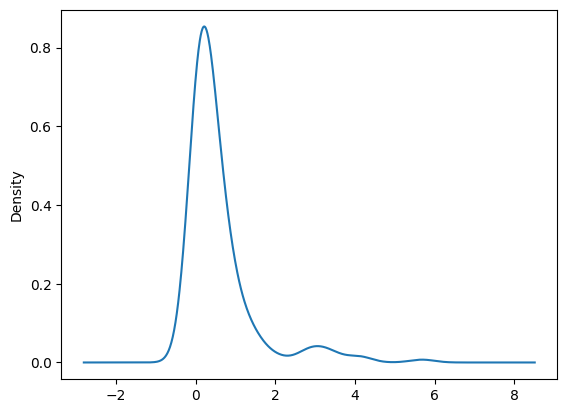

In [50]:
rainy_days.plot(kind='kde')

In [51]:
# to improve the model, could use a higher-order Markov chain (depends on last 2~3 days)

4. Taxicab trajectories: Using the pickled taxicab data, we want to complete the exercise from class.

- For the taxicab trajectory data, determine your state space and clean your sequences of cab rides.
- Compute the transition matrix for the taxicab data between neighborhoods in Manhattan. Plot it in a heat map. What are the most common routes?
- Explain why taxicabs are most likely order 1, and not 2 or more.
- Starting at Hell's Kitchen, create a sequence of forecasts of where the cab is likely to be in 2, 3, 5, and 10 trips
- Starting at any neighborhood, iterate your forecast until it is no longer changing very much. Where do cabs spend most of their time working in Manhattan?

In [52]:
# load the pickle file
df = pd.read_pickle('data/taxicab.pkl')
# df # I used this to checkout the data but results are too long so removed to easier viewing

In [53]:
type(df)

list

In [54]:
# For the taxicab trajectory data, determine your state space and clean your sequences of cab rides.

sequences = df  # If already a list of lists

# Clean sequences: remove 'Outside Manhattan'
cleaned_sequences = []
for seq in sequences:
    cleaned = [n for n in seq if n != 'Outside Manhattan']
    if cleaned:
        cleaned_sequences.append(cleaned)

# Flatten for state space
flat_seq = [n for seq in cleaned_sequences for n in seq]
states = list(set(flat_seq))
print(f"States:\n{states}")


States:
['East Harlem', 'SoHo', 'Tribeca', 'Flatiron District', 'Financial District', 'Civic Center', 'East Village', 'Theater District', 'Kips Bay', 'Lower East Side', 'Battery Park City', 'Ellis Island', 'Harlem', 'Midtown', 'Gramercy', 'Upper West Side', 'Little Italy', 'Upper East Side', 'West Village', 'Chinatown', 'NoHo', 'Chelsea', 'Marble Hill', 'Liberty Island', "Randall's Island", 'Roosevelt Island', 'Morningside Heights', 'Nolita', 'Washington Heights', "Hell's Kitchen", 'Stuyvesant Town', 'Two Bridges', 'Central Park', 'Governors Island', 'Greenwich Village', 'Murray Hill', 'Inwood']


In [55]:
# Compute the transition matrix for the taxicab data between neighborhoods in Manhattan. Plot it in a heat map. What are the most common routes?

# Convert to NumPy array for consistency
seq = np.array(flat_seq, dtype=str)

# Convert states to plain Python strings
states = [str(s) for s in np.unique(seq)]

# Transition counts
S = len(states)
T = len(seq)
tr_counts = np.zeros((S, S))

for t in range(1, T):
    x_tm1 = seq[t-1]  # previous state
    x_t = seq[t]      # current state
    idx_from = states.index(x_tm1)
    idx_to = states.index(x_t)
    tr_counts[idx_to, idx_from] += 1

print("\nTransition Counts:\n", tr_counts)


Transition Counts:
 [[6.03390e+04 1.14800e+03 1.76310e+04 ... 6.12600e+03 1.81000e+02
  1.31100e+04]
 [7.05000e+02 5.24970e+04 1.17520e+04 ... 6.18610e+04 8.32000e+02
  3.31100e+03]
 [1.68390e+04 1.22890e+04 6.66502e+05 ... 6.93070e+04 2.70600e+03
  1.26742e+05]
 ...
 [4.71800e+03 8.27290e+04 7.05780e+04 ... 7.67948e+05 1.34360e+04
  2.23940e+04]
 [2.25000e+02 9.97000e+02 4.54700e+03 ... 1.32820e+04 1.13040e+04
  1.58300e+03]
 [1.42620e+04 3.54100e+03 1.25823e+05 ... 2.14030e+04 1.05900e+03
  2.43636e+05]]


In [56]:
# Normalize
sums = tr_counts.sum(axis=1, keepdims=True)
tr_pr = np.divide(tr_counts, sums, out=np.zeros_like(tr_counts), where=sums!=0)

print("\nTransition Proportions:")
print(pd.DataFrame(np.round(tr_pr, 2), index=states, columns=states))


Transition Proportions:
                     Battery Park City  Central Park  Chelsea  Chinatown  \
Battery Park City                 0.26          0.01     0.08       0.01   
Central Park                      0.00          0.14     0.03       0.00   
Chelsea                           0.01          0.01     0.34       0.00   
Chinatown                         0.02          0.00     0.07       0.13   
Civic Center                      0.02          0.00     0.07       0.05   
East Harlem                       0.00          0.02     0.03       0.00   
East Village                      0.01          0.00     0.07       0.01   
Ellis Island                      0.00          0.00     0.00       0.00   
Financial District                0.05          0.00     0.06       0.02   
Flatiron District                 0.01          0.01     0.15       0.00   
Governors Island                  0.00          0.00     0.17       0.17   
Gramercy                          0.00          0.00     0.08  

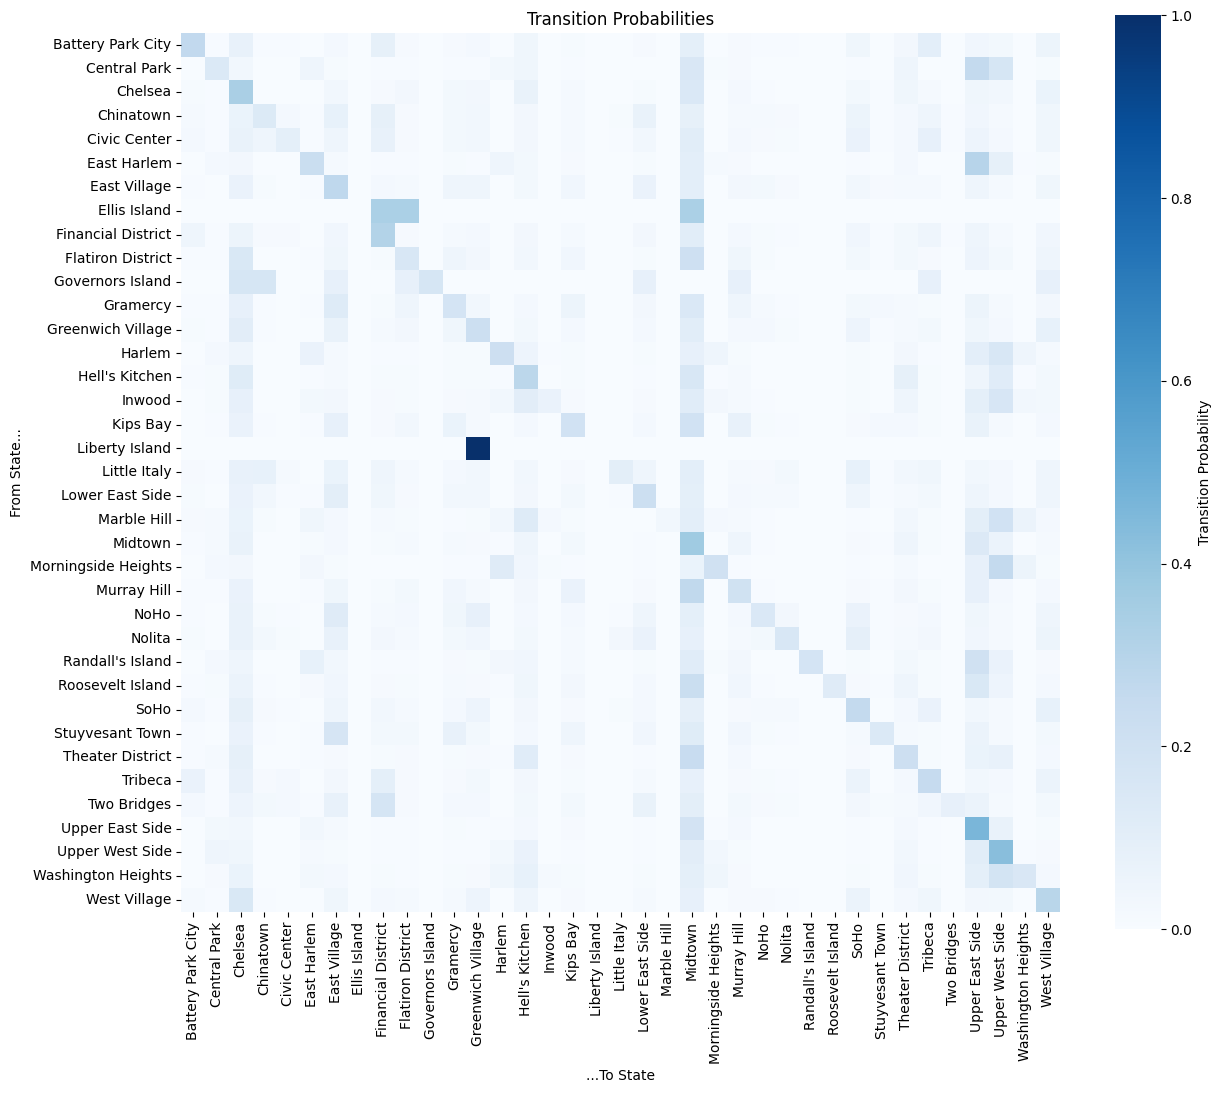

In [57]:
# Heatmap

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(13, 11))
sns.heatmap(tr_pr, cmap='Blues', square=True,
            xticklabels=states, yticklabels=states,
            cbar_kws={'label': 'Transition Probability'})
plt.title('Transition Probabilities')
plt.xlabel('...To State')
plt.ylabel('From State...')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Explain why taxicabs are most likely order 1, and not 2 or more.


Taxicab trajectories are most likely order 1 because the next neighborhood depends mainly on the current one.
Passenger demand is local and immediate, so past locations have little influence.


In [58]:
# Starting at Hell's Kitchen, create a sequence of forecasts of where the cab is likely to be in 2, 3, 5, and 10 trips

# Initial density vector
density = np.zeros(S)
density[states.index("Hell's Kitchen")] = 1

print("\nInitial Density:\n", density.reshape(-1, 1))

for k in [2, 3, 5, 10]:
    forecast = density.copy()
    for _ in range(k):
        forecast = tr_pr @ forecast
    print(f"\nForecast after {k} trips:")
    print(pd.Series(forecast, index=states).sort_values(ascending=False).head(10))


Initial Density:
 [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]

Forecast after 2 trips:
Hell's Kitchen         0.122986
Theater District       0.088481
Marble Hill            0.084974
Inwood                 0.081225
Washington Heights     0.075378
Upper West Side        0.070804
Chelsea                0.070800
Harlem                 0.063616
Morningside Heights    0.060060
Midtown                0.059221
dtype: float64

Forecast after 3 trips:
Hell's Kitchen         0.079967
Theater District       0.071367
Marble Hill            0.069211
Inwood                 0.068116
Washington Heights     0.067442
Upper West Side        0.066819
Chelsea                0.064810
Morningside Heights    0.064306
Harlem                 0.063342
Midtown                0.060015
dtype: float64

Forecast after 5 trips:
Hell's Kitche

In [59]:
# Starting at any neighborhood, iterate your forecast until it is no longer changing very much. Where do cabs spend most of their time working in Manhattan?
# it look like it is almost the same no matter where the cab driver is at in Manhattan

prev = None
while True:
    next_density = tr_pr @ density
    if prev is not None and np.allclose(next_density, prev, atol=1e-6):
        break
    prev = next_density.copy()
    density = next_density.copy()

print("\nStationary Distribution (Top 10):")
print(pd.Series(density, index=states).sort_values(ascending=False))



Stationary Distribution (Top 10):
Morningside Heights    0.059441
Upper West Side        0.059441
Central Park           0.059441
East Harlem            0.059441
Harlem                 0.059441
Upper East Side        0.059440
Washington Heights     0.059440
Marble Hill            0.059440
Randall's Island       0.059440
Inwood                 0.059440
Hell's Kitchen         0.059439
Midtown                0.059439
Theater District       0.059439
Roosevelt Island       0.059439
Murray Hill            0.059438
Chelsea                0.059438
Flatiron District      0.059438
Kips Bay               0.059438
Ellis Island           0.059438
Gramercy               0.059438
Stuyvesant Town        0.059437
Greenwich Village      0.059437
Civic Center           0.059437
West Village           0.059437
East Village           0.059437
Two Bridges            0.059437
Lower East Side        0.059437
Financial District     0.059437
Battery Park City      0.059437
Little Italy           0.059437
NoHo 